In [10]:
import numpy as np
import torch
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from segmentation_models_pytorch.losses import DiceLoss
from segmentation_models_pytorch.metrics.functional import get_stats, iou_score

from dataset import SatelliteImageDataset
from unet import UNet
from res_unet_a import ResUNetA

from utils import (
    one_hot_to_image,
    plot_prediction,
    compute_accuracy,
    class_index_to_one_hot,
    class_index_to_image,
    get_color_patches,
    print_iou,
    get_iou_by_class
)

torch.manual_seed(40)

In [11]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device 

'cuda'

In [12]:
dataset = SatelliteImageDataset(
    image_dir='data/images',
    mask_dir='data/masks'
)

In [13]:
batch_size = 1
test_loader = DataLoader(dataset, batch_size=batch_size)

In [14]:
unet_checkpoint = torch.load('unet/unet_100ep_checkpoint.pth')

unet = UNet(in_channels=3, out_channels=6).to(device)
unet.load_state_dict(unet_checkpoint['model_state_dict'])

unet_train_loss_list = unet_checkpoint['loss_list']
unet_train_acc_list = unet_checkpoint['acc_list']

C:\Users\admin\AppData\Local\Temp\ipykernel_4700\3810599240.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  unet_checkpoint = torch.load('unet/unet_100ep_checkpoint.pth'

In [15]:
res_unet_a_checkpoint = torch.load('res_unet_a/res_unet_a_100ep_checkpoint.pth')

res_unet_a = ResUNetA(in_channels=3, out_channels=6).to(device)
res_unet_a.load_state_dict(res_unet_a_checkpoint['model_state_dict'])

res_unet_a_train_loss_list = res_unet_a_checkpoint['loss_list']
res_unet_a_train_acc_list = res_unet_a_checkpoint['acc_list']

C:\Users\admin\AppData\Local\Temp\ipykernel_4700\426264204.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  res_unet_a_checkpoint = torch.load('res_unet_a/res_unet_a_100e

In [16]:
criterion = DiceLoss('multiclass').to(device)

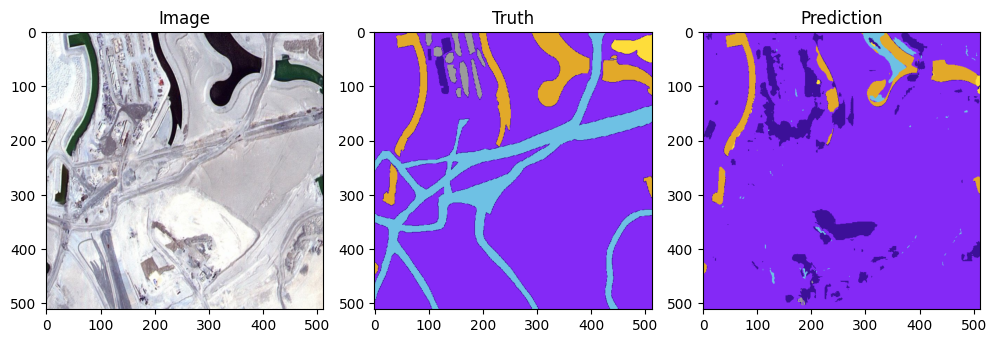

Accuracy: 0.7332 | Loss: 0.7020
IOU... building: 0.06 land: 0.73 road: 0.00 water: 0.64 


Accuracy: 0.8877 | Loss: 0.4822
IOU... building: 0.07 land: 0.87 road: 0.02 water: 0.96 unlabeled: 0.17 


Accuracy: 0.8524 | Loss: 0.4064
IOU... building: 0.35 land: 0.82 road: 0.39 vegetation: 0.72 water: 0.97 unlabeled: 0.09 


Accuracy: 0.8084 | Loss: 0.6381
IOU... building: 0.14 land: 0.81 road: 0.00 vegetation: 1.00 unlabeled: 0.00 


Accuracy: 0.8249 | Loss: 0.5000
IOU... building: 0.09 land: 0.76 road: 0.02 water: 0.92 


Accuracy: 0.8131 | Loss: 0.4224
IOU... building: 0.49 land: 0.75 road: 0.29 vegetation: 0.64 water: 0.98 


Accuracy: 0.8581 | Loss: 0.5415
IOU... building: 0.17 land: 0.84 road: 0.37 vegetation: 0.16 water: 0.97 


Accuracy: 0.7214 | Loss: 0.4797
IOU... building: 0.42 land: 0.66 road: 0.43 vegetation: 0.21 water: 0.96 


Accuracy: 0.8439 | Loss: 0.2882
IOU... building: 0.65 land: 0.77 road: 0.69 vegetation: 0.80 water: 0.99 unlabeled: 0.19 


Accuracy: 0.8047 | Loss: 0.

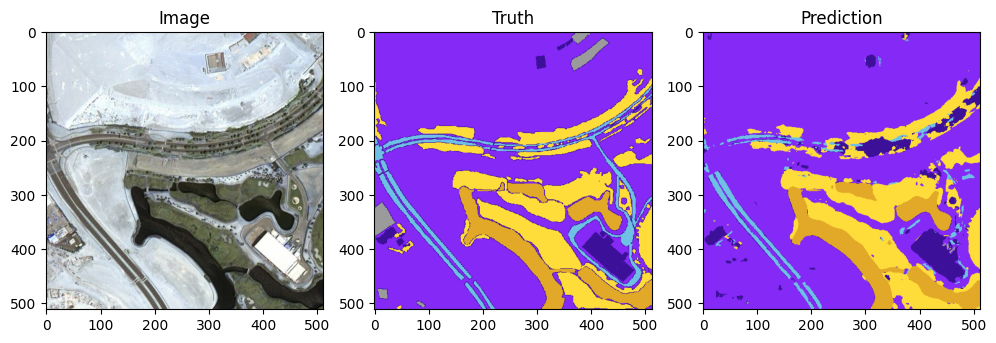

Accuracy: 0.8714 | Loss: 0.4087
IOU... building: 0.28 land: 0.87 road: 0.45 vegetation: 0.74 water: 0.89 unlabeled: 0.01 


Accuracy: 0.9644 | Loss: 0.3456
IOU... building: 0.40 land: 0.61 road: 0.12 water: 1.00 unlabeled: 0.51 


Accuracy: 0.9212 | Loss: 0.4299
IOU... building: 0.26 land: 0.81 road: 0.14 water: 0.99 unlabeled: 0.01 


Accuracy: 0.8042 | Loss: 0.4270
IOU... building: 0.29 land: 0.77 road: 0.32 vegetation: 0.86 water: 0.93 


Accuracy: 0.8715 | Loss: 0.4264
IOU... building: 0.39 land: 0.67 road: 0.07 water: 0.99 unlabeled: 0.00 


Accuracy: 0.7994 | Loss: 0.4842
IOU... building: 0.10 land: 0.78 road: 0.30 vegetation: 0.75 water: 0.92 unlabeled: 0.00 


Accuracy: 0.8765 | Loss: 0.4839
IOU... building: 0.42 land: 0.86 road: 0.19 vegetation: 0.61 water: 0.94 


Accuracy: 0.8060 | Loss: 0.2236
IOU... building: 0.74 land: 0.61 road: 0.64 vegetation: 0.57 water: 0.94 


Accuracy: 0.8444 | Loss: 0.2379
IOU... building: 0.81 land: 0.45 road: 0.52 vegetation: 0.80 water: 0.91 



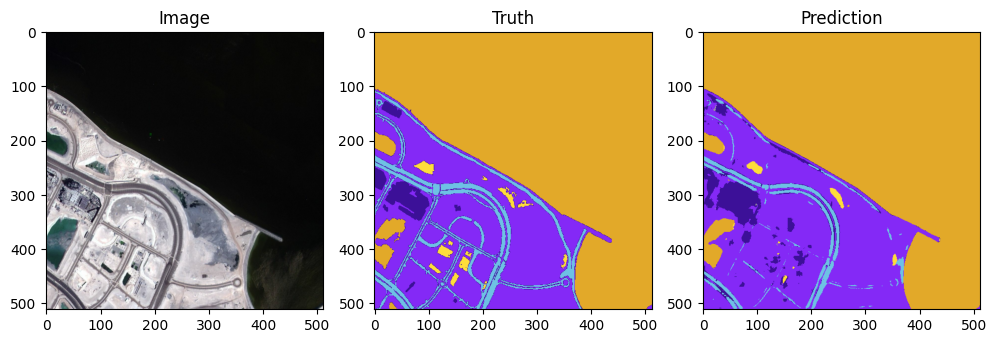

Accuracy: 0.9218 | Loss: 0.3126
IOU... building: 0.31 land: 0.80 road: 0.46 vegetation: 0.35 water: 0.99 


Accuracy: 0.9914 | Loss: 0.3964
IOU... building: 0.03 land: 0.97 road: 1.00 vegetation: 0.57 water: 0.99 


Accuracy: 0.8753 | Loss: 0.4058
IOU... building: 0.36 land: 0.83 road: 0.32 vegetation: 0.94 water: 0.94 


Accuracy: 0.8531 | Loss: 0.4358
IOU... building: 0.45 land: 0.81 road: 0.40 vegetation: 0.56 water: 0.95 


Accuracy: 0.9806 | Loss: 0.4320
IOU... building: 0.08 land: 0.97 road: 0.49 water: 0.98 


Accuracy: 0.8955 | Loss: 0.4540
IOU... building: 0.60 land: 0.84 road: 0.33 vegetation: 0.11 water: 0.97 unlabeled: 0.26 


Accuracy: 0.9481 | Loss: 0.3706
IOU... building: 0.04 land: 0.71 vegetation: 0.97 water: 0.90 


Accuracy: 0.9808 | Loss: 0.1977
IOU... building: 0.03 land: 0.82 vegetation: 0.98 water: 0.81 unlabeled: 1.00 


Accuracy: 0.8477 | Loss: 0.3260
IOU... building: 0.57 land: 0.82 road: 0.16 vegetation: 0.23 water: 0.82 


Accuracy: 0.9242 | Loss: 0.3781
IOU

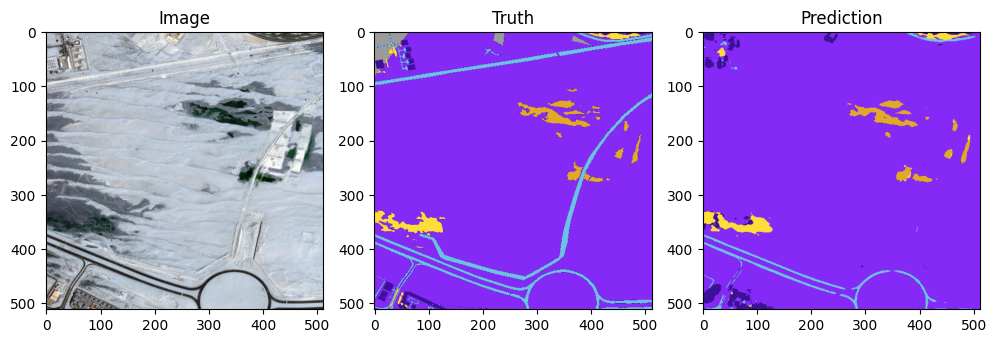

Accuracy: 0.9214 | Loss: 0.4971
IOU... building: 0.21 land: 0.92 road: 0.29 vegetation: 0.66 water: 0.77 unlabeled: 0.00 


Accuracy: 0.9985 | Loss: 0.0018
IOU... land: 1.00 unlabeled: 1.00 


Accuracy: 0.9432 | Loss: 0.4897
IOU... building: 0.01 land: 0.94 road: 0.00 vegetation: 0.01 water: 0.97 


Accuracy: 0.8221 | Loss: 0.4157
IOU... building: 0.50 land: 0.77 road: 0.54 vegetation: 0.72 water: 0.81 unlabeled: 0.05 


Accuracy: 0.8676 | Loss: 0.3264
IOU... building: 0.40 land: 0.87 road: 0.65 vegetation: 0.39 water: 0.74 


Accuracy: 0.8361 | Loss: 0.3970
IOU... building: 0.69 land: 0.80 road: 0.56 vegetation: 0.37 water: 0.96 


Accuracy: 0.7419 | Loss: 0.3395
IOU... building: 0.64 land: 0.30 road: 0.23 vegetation: 0.64 water: 0.84 


Accuracy: 0.8519 | Loss: 0.3936
IOU... building: 0.62 land: 0.86 road: 0.57 vegetation: 0.46 water: 0.93 


Accuracy: 0.7594 | Loss: 0.5751
IOU... building: 0.47 land: 0.75 road: 0.44 vegetation: 0.08 water: 0.52 unlabeled: 0.00 


Accuracy: 0.7730 | 

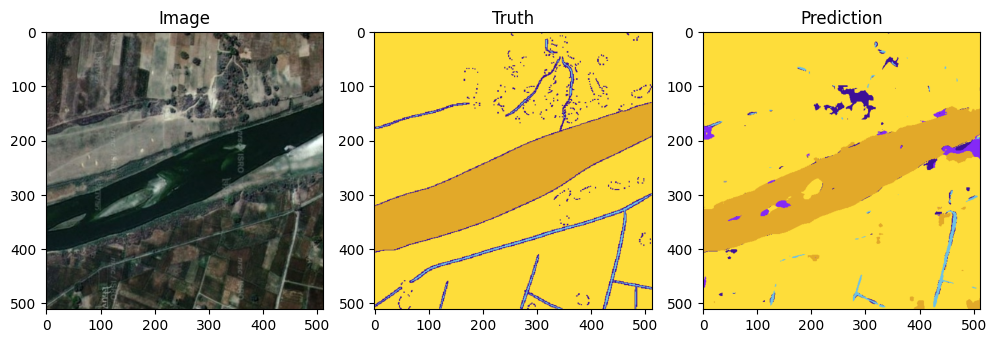

Accuracy: 0.9186 | Loss: 0.2828
IOU... building: 0.06 road: 0.22 vegetation: 0.91 water: 0.88 


Accuracy: 0.9490 | Loss: 0.2522
IOU... building: 0.10 road: 0.28 vegetation: 0.95 water: 0.97 unlabeled: 1.00 


Accuracy: 0.9499 | Loss: 0.2845
IOU... building: 0.12 road: 0.14 vegetation: 0.95 water: 0.92 unlabeled: 1.00 


Accuracy: 0.9508 | Loss: 0.2897
IOU... building: 0.09 road: 0.12 vegetation: 0.95 water: 0.92 unlabeled: 1.00 


Accuracy: 0.9446 | Loss: 0.1649
IOU... building: 0.59 road: 0.41 vegetation: 0.95 water: 1.00 unlabeled: 1.00 


Accuracy: 0.9470 | Loss: 0.1617
IOU... building: 0.59 road: 0.44 vegetation: 0.95 water: 1.00 unlabeled: 1.00 


Accuracy: 0.9445 | Loss: 0.1633
IOU... building: 0.58 land: 1.00 road: 0.43 vegetation: 0.95 unlabeled: 1.00 


Accuracy: 0.9445 | Loss: 0.1617
IOU... building: 0.58 road: 0.44 vegetation: 0.95 water: 1.00 unlabeled: 1.00 


Accuracy: 0.8848 | Loss: 0.1956
IOU... building: 0.83 road: 0.11 vegetation: 0.76 water: 1.00 unlabeled: 1.00 




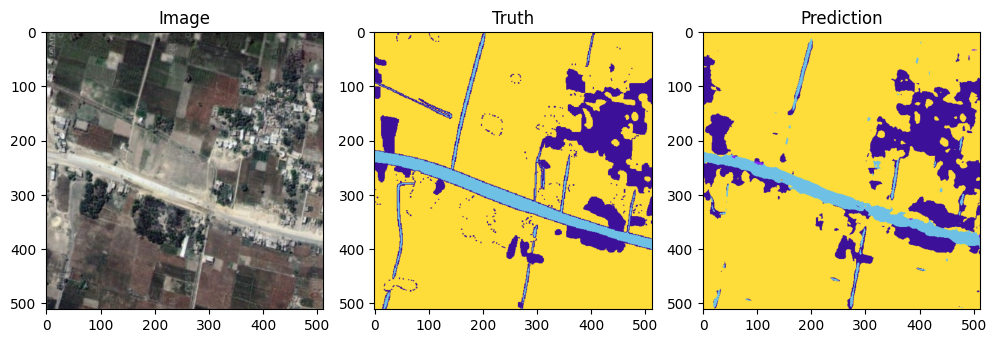

Accuracy: 0.9168 | Loss: 0.1238
IOU... building: 0.60 road: 0.68 vegetation: 0.91 unlabeled: 1.00 


Accuracy: 0.9236 | Loss: 0.1206
IOU... building: 0.62 road: 0.70 vegetation: 0.92 water: 1.00 unlabeled: 1.00 


Accuracy: 0.9140 | Loss: 0.1338
IOU... building: 0.60 road: 0.61 vegetation: 0.92 water: 1.00 unlabeled: 1.00 


Accuracy: 0.9134 | Loss: 0.1356
IOU... building: 0.60 road: 0.61 vegetation: 0.91 water: 1.00 unlabeled: 1.00 


Accuracy: 0.9456 | Loss: 0.1448
IOU... building: 0.71 road: 0.42 vegetation: 0.95 water: 1.00 unlabeled: 1.00 


Accuracy: 0.9458 | Loss: 0.1436
IOU... building: 0.71 road: 0.43 vegetation: 0.95 water: 1.00 unlabeled: 1.00 


Accuracy: 0.9477 | Loss: 0.1460
IOU... building: 0.71 road: 0.42 vegetation: 0.95 water: 1.00 


Accuracy: 0.9444 | Loss: 0.1479
IOU... building: 0.70 road: 0.41 vegetation: 0.95 water: 1.00 unlabeled: 1.00 


Accuracy: 0.9580 | Loss: 0.1918
IOU... building: 0.49 road: 0.54 vegetation: 0.97 water: 0.80 unlabeled: 1.00 


Accuracy: 0

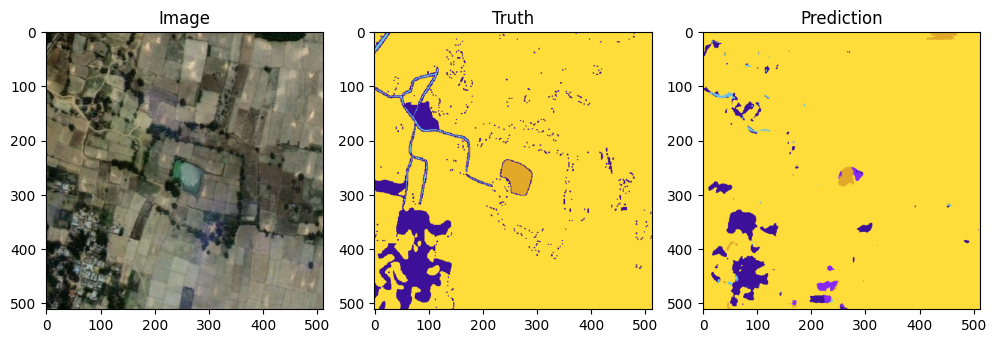

Accuracy: 0.9254 | Loss: 0.3667
IOU... building: 0.34 road: 0.08 vegetation: 0.93 water: 0.22 unlabeled: 1.00 


Accuracy: 0.9218 | Loss: 0.3598
IOU... building: 0.31 road: 0.12 vegetation: 0.92 water: 0.27 unlabeled: 1.00 


Accuracy: 0.9460 | Loss: 0.2645
IOU... building: 0.43 road: 0.14 vegetation: 0.95 water: 0.82 unlabeled: 1.00 


Accuracy: 0.9435 | Loss: 0.2707
IOU... building: 0.42 road: 0.15 vegetation: 0.94 water: 0.83 unlabeled: 1.00 


Accuracy: 0.9396 | Loss: 0.1915
IOU... building: 0.70 road: 0.18 vegetation: 0.93 water: 1.00 unlabeled: 1.00 


Accuracy: 0.9406 | Loss: 0.1859
IOU... building: 0.71 road: 0.18 vegetation: 0.94 water: 1.00 unlabeled: 1.00 


Accuracy: 0.9378 | Loss: 0.1908
IOU... building: 0.71 road: 0.20 vegetation: 0.93 water: 1.00 unlabeled: 1.00 


Accuracy: 0.9384 | Loss: 0.1921
IOU... building: 0.70 road: 0.19 vegetation: 0.93 water: 1.00 unlabeled: 1.00 


Accuracy: 0.9765 | Loss: 0.3163
IOU... building: 0.00 road: 0.00 vegetation: 0.98 water: 1.00 un

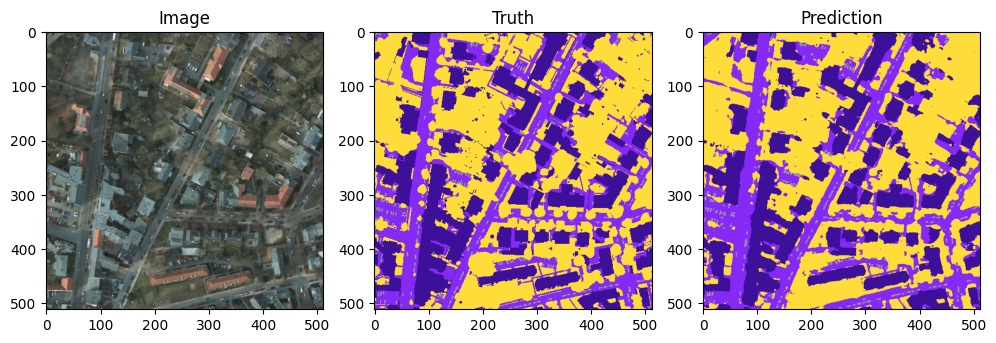

Accuracy: 0.8595 | Loss: 0.1801
IOU... building: 0.80 land: 0.65 vegetation: 0.80 unlabeled: 0.54 


Accuracy: 0.8705 | Loss: 0.1847
IOU... building: 0.82 land: 0.60 vegetation: 0.83 water: 1.00 unlabeled: 0.54 


Accuracy: 0.8280 | Loss: 0.2227
IOU... building: 0.71 land: 0.53 vegetation: 0.80 unlabeled: 0.43 


Accuracy: 0.8599 | Loss: 0.1810
IOU... building: 0.81 land: 0.63 vegetation: 0.79 unlabeled: 0.53 


Accuracy: 0.3084 | Loss: 0.0851
IOU... building: 0.31 


Accuracy: 0.8454 | Loss: 0.1845
IOU... building: 0.80 land: 0.70 vegetation: 0.70 water: 1.00 unlabeled: 0.53 


Accuracy: 0.7488 | Loss: 0.2288
IOU... building: 0.60 land: 0.54 vegetation: 0.65 unlabeled: 0.53 


Accuracy: 0.8557 | Loss: 0.1877
IOU... building: 0.82 land: 0.73 vegetation: 0.72 water: 1.00 unlabeled: 0.50 


Accuracy: 0.8261 | Loss: 0.1974
IOU... building: 0.66 land: 0.63 vegetation: 0.78 unlabeled: 0.50 


Accuracy: 0.8555 | Loss: 0.1733
IOU... building: 0.83 land: 0.70 road: 1.00 vegetation: 0.70 water:

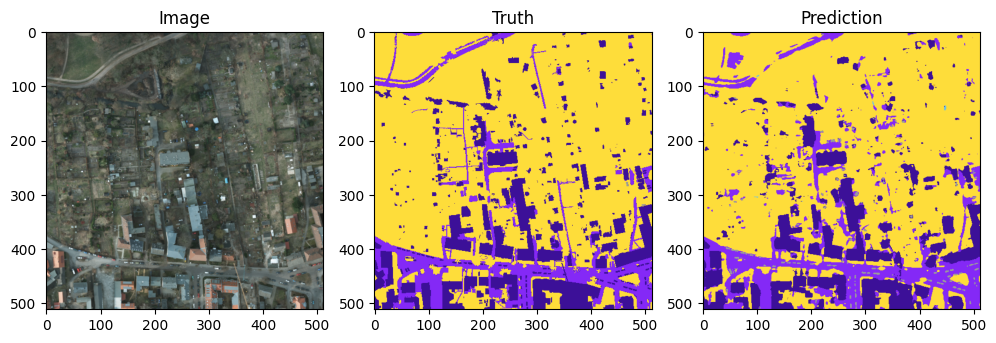

Accuracy: 0.8828 | Loss: 0.3019
IOU... building: 0.67 land: 0.56 vegetation: 0.88 unlabeled: 0.01 


Accuracy: 0.8788 | Loss: 0.1796
IOU... building: 0.81 land: 0.67 vegetation: 0.84 unlabeled: 0.50 


Accuracy: 0.8471 | Loss: 0.1791
IOU... building: 0.78 land: 0.66 vegetation: 0.76 unlabeled: 0.55 


Accuracy: 0.8939 | Loss: 0.1423
IOU... building: 0.87 land: 0.79 vegetation: 0.77 unlabeled: 0.57 


Accuracy: 0.9008 | Loss: 0.1455
IOU... building: 0.88 land: 0.83 vegetation: 0.74 unlabeled: 0.55 


Accuracy: 0.8054 | Loss: 0.2122
IOU... building: 0.71 land: 0.73 road: 1.00 vegetation: 0.49 unlabeled: 0.52 


Accuracy: 0.9013 | Loss: 0.1545
IOU... building: 0.85 land: 0.85 vegetation: 0.73 unlabeled: 0.53 


Accuracy: 0.8626 | Loss: 0.1764
IOU... building: 0.85 land: 0.59 road: 1.00 vegetation: 0.77 water: 1.00 unlabeled: 0.60 


Accuracy: 0.8420 | Loss: 0.1872
IOU... building: 0.81 land: 0.60 road: 1.00 vegetation: 0.74 unlabeled: 0.58 


Accuracy: 0.8791 | Loss: 0.1609
IOU... buildin

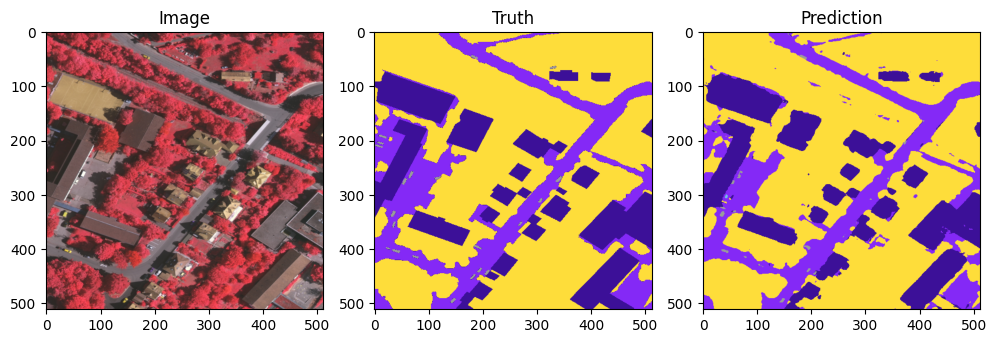

Accuracy: 0.9351 | Loss: 0.1631
IOU... building: 0.86 land: 0.78 vegetation: 0.92 water: 1.00 unlabeled: 0.35 


Accuracy: 0.8737 | Loss: 0.1978
IOU... building: 0.71 land: 0.70 vegetation: 0.86 unlabeled: 0.34 


Accuracy: 0.8870 | Loss: 0.1888
IOU... building: 0.73 land: 0.76 vegetation: 0.86 water: 1.00 unlabeled: 0.32 


Accuracy: 0.9117 | Loss: 0.1920
IOU... building: 0.80 land: 0.67 road: 1.00 vegetation: 0.90 water: 1.00 unlabeled: 0.38 


Accuracy: 0.9281 | Loss: 0.1925
IOU... building: 0.82 land: 0.71 road: 1.00 vegetation: 0.92 water: 1.00 unlabeled: 0.32 


Accuracy: 0.8969 | Loss: 0.1771
IOU... building: 0.85 land: 0.78 road: 1.00 vegetation: 0.85 unlabeled: 0.29 


Accuracy: 0.8266 | Loss: 0.1993
IOU... building: 0.69 land: 0.66 road: 1.00 vegetation: 0.83 water: 1.00 unlabeled: 0.33 


Accuracy: 0.8941 | Loss: 0.1730
IOU... building: 0.81 land: 0.73 road: 1.00 vegetation: 0.87 water: 1.00 unlabeled: 0.36 


Accuracy: 0.9156 | Loss: 0.1591
IOU... building: 0.84 land: 0.85 

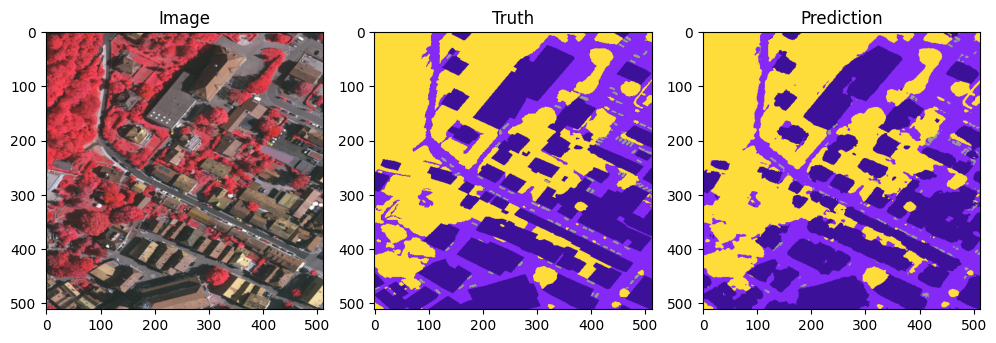

Accuracy: 0.9182 | Loss: 0.1663
IOU... building: 0.85 land: 0.78 road: 1.00 vegetation: 0.92 water: 1.00 unlabeled: 0.32 


Accuracy: 0.9202 | Loss: 0.1532
IOU... building: 0.83 land: 0.81 road: 1.00 vegetation: 0.93 water: 1.00 unlabeled: 0.37 


Accuracy: 0.9147 | Loss: 0.1581
IOU... building: 0.83 land: 0.81 road: 1.00 vegetation: 0.89 water: 1.00 unlabeled: 0.37 




In [17]:
test_acc_list = []
iou_list = torch.tensor([])
count = 0

with torch.no_grad():
    for x, y in test_loader:
        x, y = x.to(device), y.to(device) # y: (b, h, w)
        y_pred = unet(x) # y_pred: (b, 6, h, w)

        loss = criterion(y_pred, y)

        # compute accuracy 
        acc = compute_accuracy(y, y_pred, device)
        test_acc_list.append(acc.item())

        # compute iou scores 
        y_pred_argmax = torch.argmax(y_pred, 1)
        tp, fp, fn, tn = get_stats(y_pred_argmax, y, mode='multiclass', num_classes=6)
        iou = iou_score(tp, fp, fn, tn)
        iou_list = torch.cat((iou_list, iou))

        if count % 20 == 0:pred_imgs
            y_imgs = class_index_to_image(y, dataset.color_map, device)
            pred_imgs = one_hot_to_image(y_pred, dataset.color_map, device)
            plot_prediction(x, y_imgs, , dataset.color_map, dataset.mask_labels)

        count += 1

        print(f'Accuracy: {acc:.4f} | Loss: {loss:.4f}')
        print_iou(iou[0], dataset.mask_labels)
        print('\n')

In [18]:
get_iou_by_class(iou_list, avg=True)


[tensor(0.5294),
 tensor(0.7588),
 tensor(0.4948),
 tensor(0.7790),
 tensor(0.9176),
 tensor(0.5998)]

[tensor(0.5568),
 tensor(0.7652),
 tensor(0.4428),
 tensor(0.7929),
 tensor(0.8507),
 tensor(0.7119)]